In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
from src.pokemon import PokemonFactory, StatusEffect
from src.catching import attempt_catch

In [2]:
with open("ejercicio2c-config.json", "r") as file:
    config = json.load(file)

def calculate_capture_rates(param, param_values):

    def_poke_name = config["default_pokemon_name"]
    def_hp_percentage = config["default_hp_percentage"]
    def_level = config["default_level"]
    def_status = StatusEffect[config["default_status"]]
    def_pokeball = config["default_pokeball"]

    factory = PokemonFactory("pokemon.json")
    pokemon = factory.create(def_poke_name, def_level, def_status, def_hp_percentage)
    pokeball = def_pokeball

    capture_rates = []
    for val in param_values:
        if param == 'level':
            pokemon = factory.create(def_poke_name, val, def_status, def_hp_percentage)
        elif param == 'hp_percentage':
            pokemon = factory.create(def_poke_name, def_level, def_status, val)
        elif param == 'status':
            pokemon = factory.create(def_poke_name, def_level, StatusEffect[val], def_hp_percentage)
        elif param == 'pokeball':
            pokeball = val

        success, rate = attempt_catch(pokemon, pokeball)
        capture_rates.append(rate)
    return capture_rates

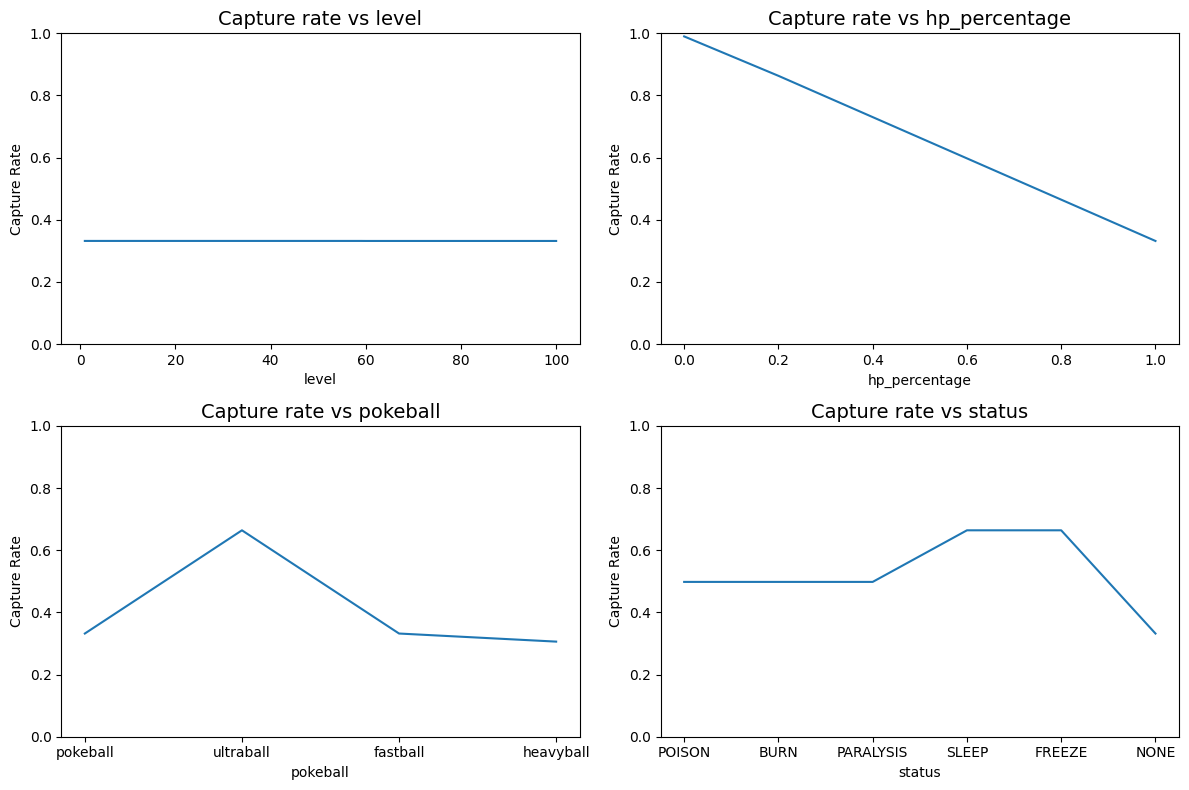

In [3]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for i, param in enumerate(['level', 'hp_percentage', 'pokeball', 'status']):
    capture_rates = calculate_capture_rates(param, config[param + 's']) 
    row, col = divmod(i, 2)  # Obtener la fila y la columna correspondientes a este parámetro en la matriz de subplots. Necesito axs[0,0], axs[0,1], axs[1,0], axs[1,1]
    axs[row, col].plot(config[param + 's'], capture_rates)
    axs[row, col].set_xlabel(param)
    axs[row, col].set_ylabel('Capture Rate')
    axs[row, col].set_ylim([0,1])
    axs[row, col].set_title(f"Capture rate vs {param}", fontsize=14)
plt.tight_layout()
plt.show()